## 차원축소
- 다차원의 데이터 셋의 차원을 축소해 새로운 차원의 데이터 셋을 생성하는 것
>- 다수의 변수(간격, 비율)==> 소수의 주성분으로 축약
>- 변수들간의 상관관계가 분석의 토대
>- 회귀/분류/군집 등 추가 분석
- 다중공선성 해소, 학습속도 향상
- 이미지나 텍스트 데이터
- PCA, LDA, SVD, NMF 등

### 비교 ( PCA vs FA )
- PCA : 자료의 양을 줄여 정보를 요약한다는 면에서 요인분석과 비슷하나 자료의 총분산을 대상으로 가능한 가장 많은 양의 분산을 설명하는 주성분들을 요인으로 추출하는 반면, 
- 요인분석: 자료의 공유분산만을 대상으로 변수들간의 내재하는 가장 많은 양의 공통분산을 설명하는 요인들을 우선적으로 요인으로 추출  
※ 분산 = 고유+공통+오차

### 1.PCA (Principal Component Analysis)
- 여러 변수간에 존재하는 상관관계를 이용
- 데이터의 분산이 최대가 되게하는 벡터 축을 잡고 그것에 직각이 되게 축 추가
- 입력 데이터의 공분산 행렬이 고유벡터와 고유값으로 분해될 수 있으며, 고유벡터를 이용해 입력데이터를 선형 변환하는 방식이 PCA

※ 수행절차
- 입력데이터 세트의 공분산 행렬을 생성
- 공분산행렬의 고유값과 고유벡터를 계산
- 고유값이 가장 큰 순으로 K개 (PCA변환차수 만큼)만큼 고유벡터를 추출
- 고유값이 가장 큰 순으로 고유벡터를 이용해 새롭게 입력데이터를 변환

$C = V \sum V^T$ 
>- (n, n) = (n, n) (n, n) (n, n)
>- $C$ : 공분산행렬
>- $V$ : 고유벡터
>- $\sum$ : 고윳값 (=설면가능한 분산 값)
>- $V^T$ : 고유벡터의 전치행렬 (Loading Vector)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
%matplotlib inline

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

In [2]:
iris = load_iris()
columns = ['sepal_length','sepal_width','petal_length','petal_width']

iris_df = pd.DataFrame(iris.data, columns=columns)
iris_df['target'] = iris.target

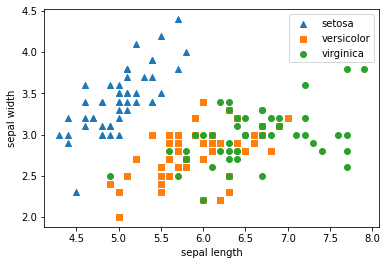

In [3]:
# 차원이 4개인 아이리스 데이터에서 두개의 피처만을 뽑아 데이터 분포 시각화

markers = ['^','s','o']
for i, marker in enumerate(markers):
  x_axis = iris_df[iris_df['target']==i]['sepal_length']
  y_axis = iris_df[iris_df['target']==i]['sepal_width']
  plt.scatter(x_axis, y_axis, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [4]:
# PCA는 데이터의 스케일에 영향을 받기 때문에 PCA 전 스케일링을 해야한다.
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_df.iloc[:,:-1]) # 마지막 컬럼이 타겟변수이니까 마지막은 제외 

In [5]:
# PCA수행


# 1번. 몇개의 주성분으로 분해할지 미리 정하고 수행
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# iris_pca 에는 두개의 주성분으로 이루어진 좌표들이 있다.(comp1, comp2)

# PCA수행한 새로운 데이터 생성(추후에 모델링이 필요하면 이 데이터에서 사용)
pca_col = ['Comp_1','Comp_2']
iris_df_pca = pd.DataFrame(iris_pca, columns=pca_col)
iris_df_pca['target']=iris.target

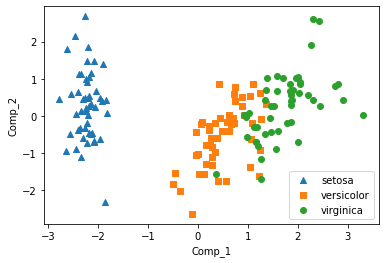

In [6]:
# PCA 수행 후 새로운 분포 시각화

markers = ['^','s','o']
for i, marker in enumerate(markers):
  x_axis = iris_df_pca[iris_df_pca['target']==i]['Comp_1']
  y_axis = iris_df_pca[iris_df_pca['target']==i]['Comp_2']
  plt.scatter(x_axis, y_axis, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('Comp_1')
plt.ylabel('Comp_2')
plt.show()

In [7]:
# 2. Scree plot 그리고 몇 개의 주성분 사용할지 고르기

# 고윳값의 값이 0.7보다 크고 누적 기여율이 80% 이상이면 고려
# 여기서는 2개의 컴포넌트를 사용하는것이 바람직해 보임
from sklearn.decomposition import PCA

pca2 = PCA()

pca2.fit(iris_scaled)
iris_pca2 = pca2.transform(iris_scaled)

result = pd.DataFrame({'설명가능한 분산 (고윳값)':pca2.explained_variance_,
             '기여율':pca2.explained_variance_ratio_},
            index=np.array([f"pc{i+1}" for i in range(iris_scaled.shape[1])]))

result['누적기여율'] = result['기여율'].cumsum()
result

,설명가능한 분산 (고윳값),기여율,누적기여율
pc1,2.938085,0.729624,0.729624
pc2,0.920165,0.228508,0.958132
pc3,0.147742,0.036689,0.994821
pc4,0.020854,0.005179,1.000000


<AxesSubplot:>

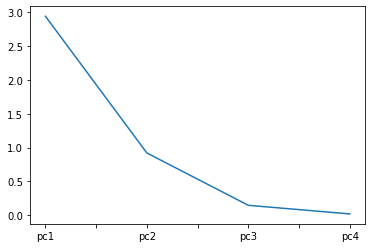

In [8]:
result['설명가능한 분산 (고윳값)'].plot()

In [9]:
loadings=pca2.components_

columns = ['sepal_length','sepal_width','petal_length','petal_width']
loadings=pd.DataFrame(loadings,columns=columns,
                     index=['pc1','pc2','pc3','pc4'])
loadings

,sepal_length,sepal_width,petal_length,petal_width
pc1,0.521066,-0.269347,0.580413,0.564857
pc2,0.377418,0.923296,0.024492,0.066942
pc3,-0.719566,0.244382,0.142126,0.634273
pc4,-0.261286,0.123510,0.801449,-0.523597


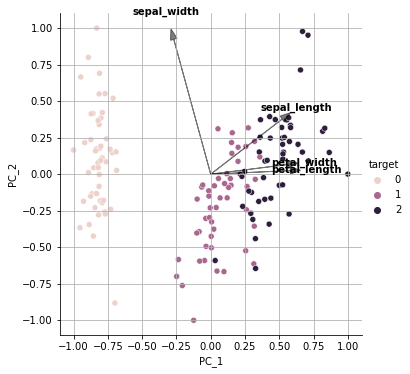

In [10]:
# 주성분에 의해 변환된 새로운 좌표를 주성분 2개를 사용하여 시각화
## Loading Vector 와 동시에 시각화하기 위해 [-1. 1] 범위로 Min-Max 스케일링을 적용한다.

from sklearn.preprocessing import MinMaxScaler
iris_pca2_StdScl = MinMaxScaler((-1,1)).fit_transform(iris_pca2 )

sns.relplot( x = iris_pca2_StdScl[:,0],
            y = iris_pca2_StdScl[:,1],
            hue = iris_df.iloc[:,4] )

# Loading Vector 시각화

coeff = loadings.T.values
labels = loadings.columns
k=4

for i in range(0, k):
        plt.arrow( 0, 0,  # 화살표 시작점
                   coeff[i,0], coeff[i,1],  # 화살표 끝점
                   color = 'k', alpha = 0.5, head_width=0.05 )
        
        plt.text( coeff[i,0]* 1.2, coeff[i,1] * 1.2,  # 텍스트가 표시될 위치
                  labels[i],  # 표시할 텍스트
                  color = 'k', fontweight = 'semibold',  ha = 'center', va = 'center')

plt.xlabel("PC_1")
plt.ylabel("PC_2")
plt.grid()
plt.show()

In [80]:
# 차원 축소한 데이터를 기계학습 시키기
# 랜덤포레스트 사용하여 분류

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rf, iris.data, iris.target, scoring='accuracy',cv=3)
print('원본데이터 교차검증 개별 정확도 : ', scores)
print('원본데이터 평균 정확도 : ', np.mean(scores))

scores_pca = cross_val_score(rf, iris_df_pca.drop('target',axis=1), iris_df_pca['target'], scoring='accuracy', cv=3)
print('PCA데이터 교차검증 개별 정확도 : ', scores_pca)
print('PCA데이터 평균 정확도 : ', np.mean(scores_pca))

원본데이터 교차검증 개별 정확도 :  [0.98 0.94 0.96]
원본데이터 평균 정확도 :  0.96
PCA데이터 교차검증 개별 정확도 :  [0.88 0.88 0.88]
PCA데이터 평균 정확도 :  0.88


### LDA (Linear Disciminant Analysis)
- PCA와 유사하지만 가장 큰 차이점은 지도학습의 분류 문제에서 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원축소
- 클래스간 분산은 최대한으로 만들고 클래스 내 분산은 최소로 만드는 방식
- PCA는 공분산행렬을 사용하지만 LDA는 클래스간 분산과 클래스내 분산 행렬을 생성한 뒤 이 행렬에 기반해 고유벡터를 구하고 입력데이터를 투영한다.
- PCA와 다르게 target data가 들어가서 훈련한다.
- n_components cannot be larger than min(n_features, n_classes - 1)

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target) # PCA와 다르게 타겟데이터가 들어간다.
iris_lda = lda.transform(iris_scaled)

lda_col = ['Comp_1','Comp_2']
iris_df_lda = pd.DataFrame(iris_lda, columns=lda_col)
iris_df_lda['target'] = iris.target

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rf, iris.data, iris.target, scoring='accuracy',cv=3)
print('원본데이터 교차검증 개별 정확도 : ', scores)
print('원본데이터 평균 정확도 : ', np.mean(scores))

scores_lda = cross_val_score(rf, iris_df_lda.drop('target',axis=1), iris_df_lda['target'], scoring='accuracy', cv=3)
print('lda데이터 교차검증 개별 정확도 : ', scores_lda)
print('lda데이터 평균 정확도 : ', np.mean(scores_lda))

원본데이터 교차검증 개별 정확도 :  [0.98 0.94 0.96]
원본데이터 평균 정확도 :  0.96
lda데이터 교차검증 개별 정확도 :  [1.   0.9  0.96]
lda데이터 평균 정확도 :  0.9533333333333333


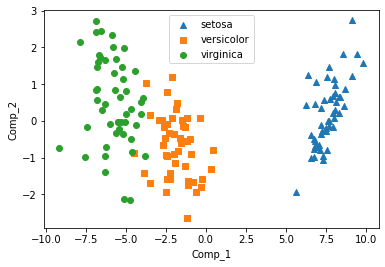

In [13]:
# LDA 수행 후 새로운 분포 시각화

markers = ['^','s','o']

for i, marker in enumerate(markers):
  x_axis = iris_df_lda[iris_df_lda['target']==i]['Comp_1']
  y_axis = iris_df_lda[iris_df_lda['target']==i]['Comp_2']
  plt.scatter(x_axis, y_axis, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('Comp_1')
plt.ylabel('Comp_2')
plt.show()

### SVD (Singular Value Decomposition) 특잇값 분해
- PCA는 정방행렬을 사용했다면 SVD는 m x n 행렬을 사용
- 사이킷런의 TruncatedSVD 사용
- PCA가 SVD 알고리즘으로 구현됐기 때문에 둘이 비슷하나 PCA는 밀집행렬에 대한 변환만 가능하다면 SVD는 희소행렬에 대한 변환도 가능
>- 희소행렬(sparse matrix): 행렬의 값이 대부분 0인 경우를 가리킴. 반대가 밀집행렬(dense matrix)

※ 고차원의 데이터셋은 보통 데이터들끼리 멀리 떨어져 가능성이 높다는 걸 유추해볼 수 있고. 따라서 고차원일수록 Overfitting 위험이 큼 이를 해결하기 위해서는 고차원에서도 데이터 끼리의 밀도가 높아질 때까지 매우 큰 규모의 dataset을 확보하는 것임. 그러나 일정한 밀도에 도달하기까지 필요한 데이터 수는 차원 수가 커짐에 따라 기하급수적으로 늘어나기 때문에 현실적으로 어려움 따라서 차원축소가 필요

$A = U \sum V^T$ 에서 $V$가 주성분

* (m, n)=(m, m) (m, n) (n, n)

m: 샘플 개수, n: 특성 개수

In [14]:
from sklearn.decomposition import TruncatedSVD

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

tsvd_col = ['Comp_1','Comp_2']
iris_df_tsvd = pd.DataFrame(iris_tsvd, columns=tsvd_col)
iris_df_tsvd['target'] = iris.target

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rf, iris.data, iris.target, scoring='accuracy',cv=3)
print('원본데이터 교차검증 개별 정확도 : ', scores)
print('원본데이터 평균 정확도 : ', np.mean(scores))

scores_tsvd = cross_val_score(rf, iris_df_tsvd.drop('target',axis=1), iris_df_tsvd['target'], scoring='accuracy', cv=3)
print('lda데이터 교차검증 개별 정확도 : ', scores_tsvd)
print('lda데이터 평균 정확도 : ', np.mean(scores_tsvd))

원본데이터 교차검증 개별 정확도 :  [0.98 0.94 0.96]
원본데이터 평균 정확도 :  0.96
lda데이터 교차검증 개별 정확도 :  [0.88 0.88 0.88]
lda데이터 평균 정확도 :  0.88


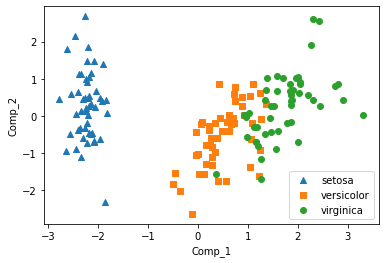

In [90]:
# SVD 수행 후 새로운 분포 시각화

markers = ['^','s','o']

for i, marker in enumerate(markers):
  x_axis = iris_df_tsvd[iris_df_tsvd['target']==i]['Comp_1']
  y_axis = iris_df_tsvd[iris_df_tsvd['target']==i]['Comp_2']
  plt.scatter(x_axis, y_axis, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('Comp_1')
plt.ylabel('Comp_2')
plt.show()

### NMF (Non-Negative Matrix Factorization)
- SVD와 유사하지만 원본 행렬 내의 모든 원소 값이 모두 양수라는게 보장되면 좀 더 간단하게 두개의 기반 양수 행렬로 분해할 수 있는 기법
- 스케일링 하면 안됨, 하더라도 MinMaxScaler해야!( PCA,LDA,SVD는 반드시 StandardScaler로 스케일링 해야)

In [16]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=2)
nmf.fit(iris.data) # 음수값이 있는 데이터는 사용 불가
iris_nmf = nmf.transform(iris.data)

nmf_col = ['Comp_1','Comp_2']
iris_df_nmf = pd.DataFrame(iris_nmf, columns=nmf_col)
iris_df_nmf['target'] = iris.target

In [21]:
iris_df_nmf.head()

,Comp_1,Comp_2,target
0,0.107038,1.323709,0
1,0.136809,1.169816,0
2,0.103238,1.209417,0
3,0.143170,1.120281,0
4,0.098973,1.331395,0


In [17]:
rf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rf, iris.data, iris.target, scoring='accuracy',cv=3)
print('원본데이터 교차검증 개별 정확도 : ', scores)
print('원본데이터 평균 정확도 : ', np.mean(scores))

scores_nmf = cross_val_score(rf, iris_df_nmf.drop('target',axis=1), iris_df_nmf['target'], scoring='accuracy', cv=3)
print('nmf데이터 교차검증 개별 정확도 : ', scores_nmf)
print('nmf데이터 평균 정확도 : ', np.mean(scores_nmf))

원본데이터 교차검증 개별 정확도 :  [0.98 0.94 0.96]
원본데이터 평균 정확도 :  0.96
nmf데이터 교차검증 개별 정확도 :  [0.98 0.92 0.96]
nmf데이터 평균 정확도 :  0.9533333333333333


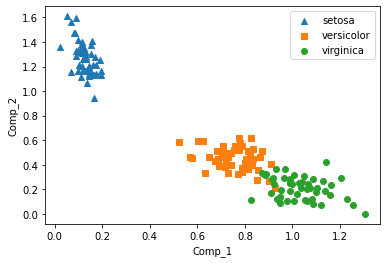

In [18]:
# NMF 수행 후 새로운 분포 시각화

markers = ['^','s','o']

for i, marker in enumerate(markers):
  x_axis = iris_df_nmf[iris_df_nmf['target']==i]['Comp_1']
  y_axis = iris_df_nmf[iris_df_nmf['target']==i]['Comp_2']
  plt.scatter(x_axis, y_axis, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('Comp_1')
plt.ylabel('Comp_2')
plt.show()

- 1. 데이터 셋의 차원축소의 목적 
>- 훈련알고리즘의 속도를 높이기 위해 (어떤 경우에는 잡음과 중복된 특성을 삭제할수도 있어 훈련 알고리즘의 성능을 높이기도 함)
>- 데이터를 시각화하고 가장 중요한 특성에 대한 통찰을 얻기 위해
>- 메모리 공간을 절약하기 위해(압축)
- 2. 대표적 단점
>- 일부 정보를 잃어 버려 알고리즘의 성능을 감소시킬수 있음
>- 머신러닝 파이프라인의 복잡도 증가시키고, 계산비용이 높음
>- 변환된 데이터를 이해하기 힘듬
- 3. 차원의 저주
>- 저차원공간에는 없는 많은 문제가 고차원 공간에서 일어난다는 사실을 말하는 것으로 머신러닝에서 선택한 고차원 벡터는 매우 희소해서 과대적합의 위험이 크고, 많은 양의 데이터가 있지 않으면 데이터에 있는 패턴을 잡아내기 매우 어려운 것이 흔한 현상
>- 차원의 수에 최소 몇배 이상의 데이터 샘플이 필요
- 4. 매우 비선형적인 데이터셋의 차원을 축소하는데 PCA를 사용할수 있을까?
>- PCA는 불필요한 차원을 제거할 수 있기 때문에 비선형적이라도 대부분의 데이터셋에서 차원을 축소하는데 사용가능
>- 그러나 불팔요한 차원이 없는 경우 (예 : 스위스롤 데이터셋의 경우) PCA와 같은 차원축소를 할 경우 너무 많은 정보를 잃어 버림
- 5. 설명된 분산을 95%로 지정한 PCA를 1,000개의 차원을 가진 데이터셋에 적용한다고 가정, 결과 데이터셋의 차원은 얼마가 될까?
>- 데이터셋에 따라 다름 즉 거의 완벽하게 일렬로 늘어선 상관관계가 1인 데이터셋의 경우 단 하나의 차원으로 축소해도 퍼짐의 95%를 설명 가능,  반대로 완전 무작위로 1000개의 차원에 걸쳐있는 데이터셋의 경우 950개의 차원이 필요
>- 따라서 데이터셋에 따라 달라지고 1에서 950사이의 어떤수도 될수 있다가 답입니다.
- 6. 기본PCA, 점진적 PCA, 랜덤 PCA, 커널 PCA는 어느경우에 사용될까?
>- 기본PCA가 우선사용지만, 데이터셋 크기가 메모리에 맞을 때 가능
>- 점진적 PCA는 메모리에 담을수 없는 대용량 데이터에 적합하고, 새로운 샘플이 발생될때마다 실시간으로 PCA를 적용해야하는 온라인작업에 사용가능
>- 랜덤 PCA는 데이터셋이 메모리 크기에 맞고, 차원을 축소시킬때 사용, 기본PCA보다 훨씬 빠름
>- 커널 PCA는 비선형 데이터셋에 유용
- 7. 어떤 데이터셋에 적용한 축소 알고리즘의 성능은 어떻게 평가할 수 있을까
>- 너무 많은 정보를 잃지 않고 차원을 많이 제거할수 있다면 차원축소 알고리즘이 잘 작동한 것임
>- 즉 차원축소를 하더라도 성능면에서 원본데이터셋을 사용했을때와 비슷한 결과를 내면 잘 차원축소가 작동한 것임  

Mnist연습문제

In [22]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

In [23]:
X_train = mnist['data'][:60000]
y_train = mnist['target'][:60000]

X_test = mnist['data'][60000:]
y_test = mnist['target'][60000:]

In [55]:
X_train.shape, y_train.shape

((60000, 784), (60000,))

In [24]:
from sklearn.linear_model import LogisticRegression
import time

log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
t0 = time.time()
log_clf.fit(X_train, y_train)
t1 = time.time()

In [25]:
print("훈련 시간: {:.2f}s".format(t1 - t0))

훈련 시간: 26.26s


In [26]:
from sklearn.metrics import accuracy_score

y_pred = log_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9255

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

In [28]:
log_clf2 = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
t0 = time.time()
log_clf2.fit(X_train_reduced, y_train)
t1 = time.time()

In [29]:
print("훈련 시간: {:.2f}s".format(t1 - t0))

훈련 시간: 9.27s


In [30]:
y_pred = log_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.9201

- pca수행전 정확도 92.55%, 시간은 32.71초
- pca수행후 정확도 92.01%, 시간은 12.31초